In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Load Data

df = pd.read_csv("Updated_HD_Data")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Linear Regression

In [3]:
# Set the X and y variables with corresponding data

y = df['target']
X = df.drop(columns = ['target'], axis = 1)

In [4]:
# Check to make sure X does not have target 

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
# Add the constant

X = sm.add_constant(X)
X

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,1.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,1.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,1.0,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,1.0,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,1.0,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
# Initialize the OLS method

model = sm.OLS(y,X)

In [7]:
# Fit the model

model = model.fit()

In [8]:
# Identifying important features

params = model.params
params.sort_values()

sex        -0.195996
exang      -0.144046
thal       -0.119039
ca         -0.100602
oldpeak    -0.058789
trestbps   -0.001991
age        -0.000820
chol       -0.000354
thalach     0.003019
fbs         0.017374
restecg     0.049848
slope       0.078979
cp          0.112703
const       0.828899
dtype: float64

In [9]:
# Get the results from our model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           1.49e-38
Time:                        11:44:11   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8289      0.293      2.830      0.005       0.252       1.405
age           -0.0008      0.003     -0.304      0.761      -0.006       0.004
sex           -0.1960      0.047     -4.157      0.000      -0.289      -0.103
cp             0.1127      0.022      5.036      0.000       0.069       0.157
trestbps      -0.0020      0.001     -1.583      0.114      -0.004       0.000
chol          -0.0004      0.000     -0.838      0.403      -0.001       0.000
fbs            0.0174      0.060      0.291      0.771      -0.100       0.135
restecg        0.0498      0.040      1.249      0.213      -0.029       0.128
thalach        0.0030      0.001      2.671      0.008       0.001       0.005
exang         -0.1440      0.051     -2.804      0.005      -0.245      -0.043
oldpeak       -0.0588      0.023     -2.564      0.011      -0.104      -0.014
slope          0.0790      0.042      1.863      0.063      -0.004       0.162
ca            -0.1006      0.022     -4.603      0.000      -0.144      -0.058
thal          -0.1190      0.036     -3.339      0.001      -0.189      -0.049
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                     4.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Initialize Linear Regression, then fit X and y

line = LinearRegression().fit(X,y)

In [11]:
# Score of regression model

line.score(X,y)

0.5175499644256842

In [12]:
# Use Linear Regression to predict X

pred_X = line.predict(X)

Text(0.5, 1.0, 'Regressive Curve of Preditive Data')

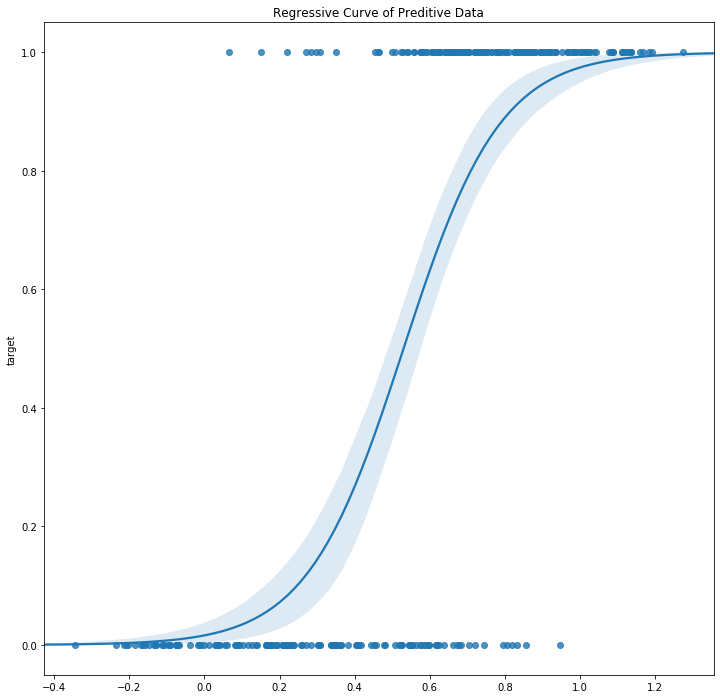

In [13]:
# Graph the results to visualize the regression line

fig = plt.figure(figsize=(12, 12))
sns.regplot(x=pred_X, y=y, logistic = True).set_title('Regressive Curve of Preditive Data')

## Logistic Regression 1

In [14]:
# First test of logistic Regression using default parameters, excpet max_iter

lr1 = LogisticRegression(max_iter = 100000)

In [15]:
# Set the X and y variables with corresponding data

y = df['target']
X = df.drop(columns = ['target'], axis = 1)

In [16]:
# Fit the data

lr1.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# Score data

lr1.score(X,y)

0.8481848184818482

In [18]:
# Create Prediction of y

y_pred = lr1.predict(X)

In [19]:
# Make the confusion matrix

cm = confusion_matrix(y, y_pred)
cm

array([[105,  33],
       [ 13, 152]])

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


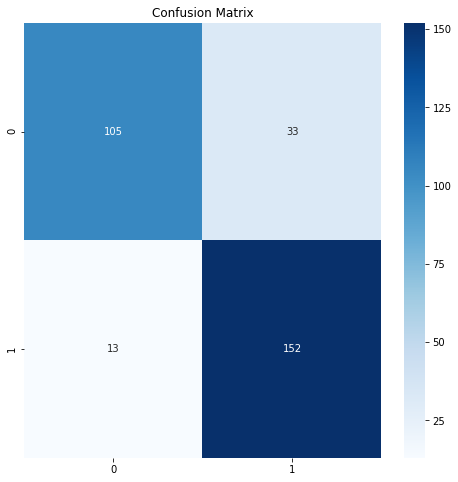

In [20]:
# Visualize confusion matrix

fig = plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt='g', cmap = 'Blues').set_title("Confusion Matrix")
fig.show()

# 105 people True Positive - tested positive and have HD
# 33 people False Positive - tested positive, but do not have HD
# 13 people False Negative - tested negative, but have HD
# 152 people True Negative - tested negative and do not have HD

In [21]:
# Print classification report 

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       138
           1       0.82      0.92      0.87       165

    accuracy                           0.85       303
   macro avg       0.86      0.84      0.84       303
weighted avg       0.85      0.85      0.85       303



## Logisitic Regression GridSearch

In [22]:
# Setting X and y variables

X = df.drop(columns = ['target'])
y = df.target

In [23]:
# Initialize logistic regression using grid search

lrgs = LogisticRegression(max_iter = 100000)

In [24]:
# Create parameters
params = {'penalty':('l1', 'l2', 'elasticnet'), 'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
          'multi_class':('auto', 'ovr', 'multinomial')}

In [27]:
# Create variable for GridSearch

gs = GridSearchCV(lrgs, params)

In [28]:
# Fit data

gs.fit(X, y)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/U

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  F

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'multi_class': ('auto', 'ovr', 'multinomial'),
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
          

In [29]:
# Retrievr best parameters

gs.best_params_

{'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}

In [30]:
# Create Prediction 

pred = gs.predict(X)

In [31]:
# Create confusion matrix

cm = confusion_matrix(y, pred)
cm

array([[105,  33],
       [ 11, 154]])

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


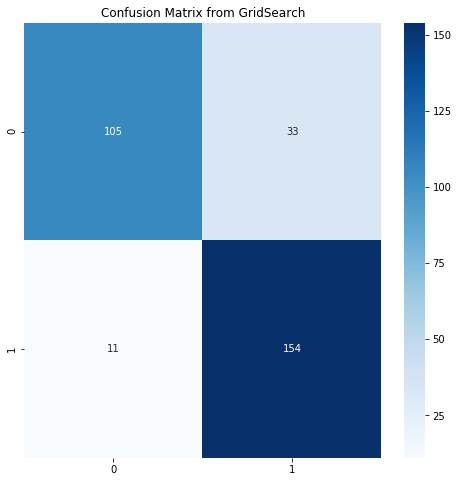

In [32]:
# Graph the confusion matrix

fig = plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt='g', cmap = 'Blues').set_title("Confusion Matrix from GridSearch")
fig.show()

# 105 people True Positive - tested positive and have HD
# 33 people False Positive - tested positive, but do not have HD
# 11 people False Negative - tested negative, but have HD
# 154 people True Negative - tested negative and do not have HD

In [33]:
# Print classification report 

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       138
           1       0.82      0.93      0.87       165

    accuracy                           0.85       303
   macro avg       0.86      0.85      0.85       303
weighted avg       0.86      0.85      0.85       303



### Implement SMOTE

In [34]:
# Import packag

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [35]:
# Setting X and y variables

X = df.drop(columns = ['target'])
y = df.target

In [36]:
# Creating our train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
# Fit training data with SMOTE

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [42]:
# Using best parameters from gridsearch to create new prediction

pred2 = gs.predict(X_train)

In [43]:
# Create new confusion matrix

cm = confusion_matrix(pred2, y_train)
cm

array([[ 72,   7],
       [ 22, 111]])

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


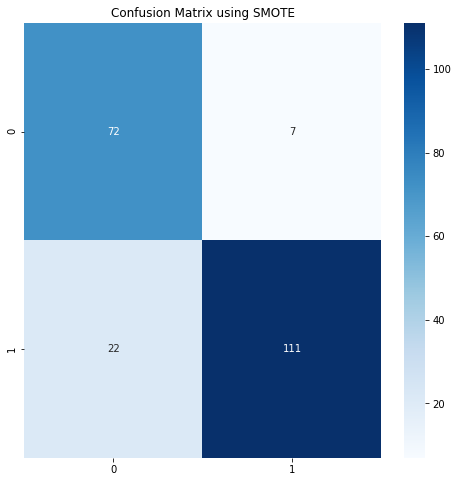

In [48]:
# Create new confusion matrix of results

fig = plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt='g', cmap = 'Blues').set_title("Confusion Matrix using SMOTE")
fig.show()

# 72 people True Positive - tested positive and have HD
# 7 people False Positive - tested positive, but do not have HD
# 22 people False Negative - tested negative, but have HD
# 111 people True Negative - tested negative and do not have HD

In [46]:
# Print statistical results

print(classification_report(pred2, y_train))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        79
           1       0.94      0.83      0.88       133

    accuracy                           0.86       212
   macro avg       0.85      0.87      0.86       212
weighted avg       0.88      0.86      0.87       212



#### Using SMOTE Increased our accuracy by 1%